In [158]:
# basic
import numpy as np
import pandas as pd
from IPython.display import display
import sys
import os
sys.path.append('../../utils')

In [159]:
# visualization
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [160]:
# utils libs
from process import *

In [161]:
## Creating an object
%time ip = ImagePrec(path = '../../data/train',size=128, channel=3, normalize=False, augment=True)


## Generating training batch for the training process
%time train = ip.get_batch_data(expand=4, seed=17)
%time print train['x'].shape
%time print train['y'].shape

Extracting training image info ...
Time Usage: 47.0595891476 sec
5360 5360 5360
CPU times: user 42.4 s, sys: 5.14 s, total: 47.5 s
Wall time: 47.1 s
Getting cropped images ...
Time Usage: 0.144509077072 sec
CPU times: user 2.53 s, sys: 638 ms, total: 3.17 s
Wall time: 3.13 s
(21440, 128, 128, 3)
CPU times: user 204 µs, sys: 297 µs, total: 501 µs
Wall time: 422 µs
(21440, 128, 128)
CPU times: user 117 µs, sys: 165 µs, total: 282 µs
Wall time: 230 µs


In [162]:
idx = np.array([np.random.randint(len(train['x'])) for i in range(9)])
print idx

[ 8631 18766  1926 14956 19941 18334 19091 19231 17744]


In [163]:
imgs = train['x'][idx]
masks = train['y'][idx]

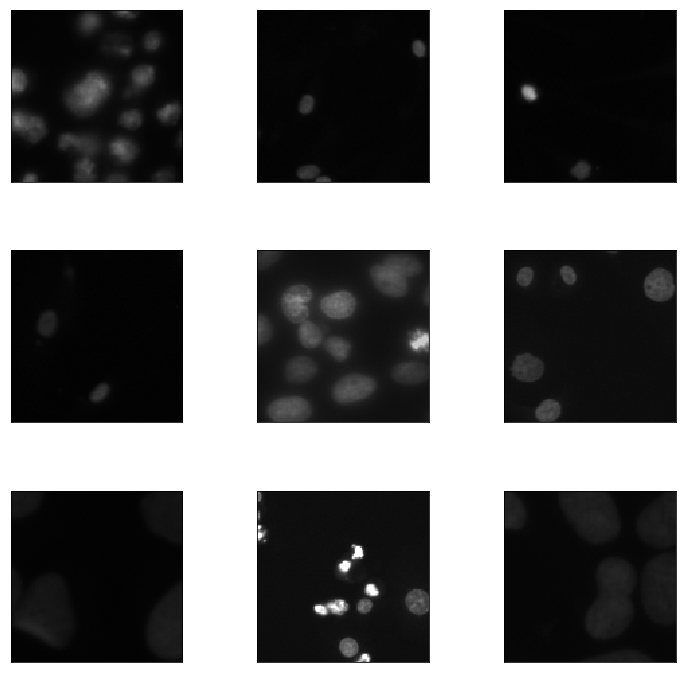

In [164]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

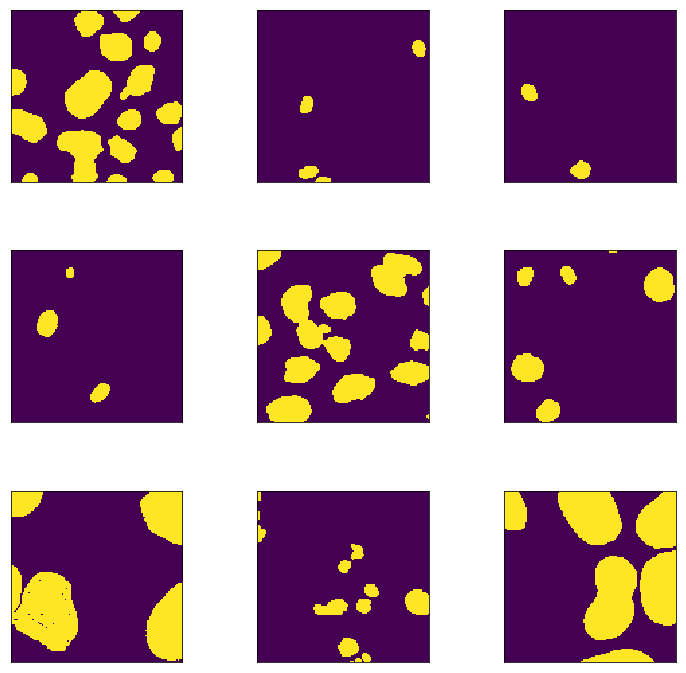

In [165]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [166]:
print len(ip._imgs)
idx = np.array([np.random.randint(len(ip._imgs)) for i in range(9)])
imgs = [ip._imgs[i] for i in idx]
masks = [ip._masks[i] for i in idx]

5360


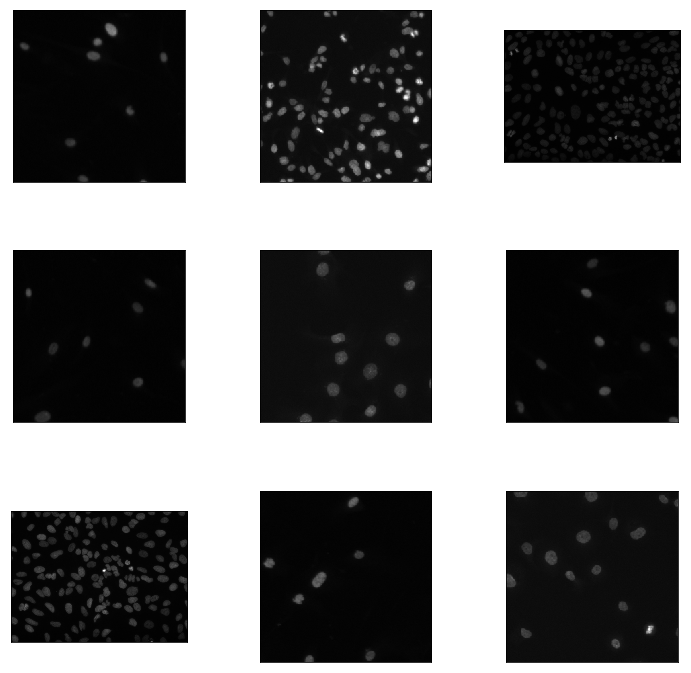

In [167]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

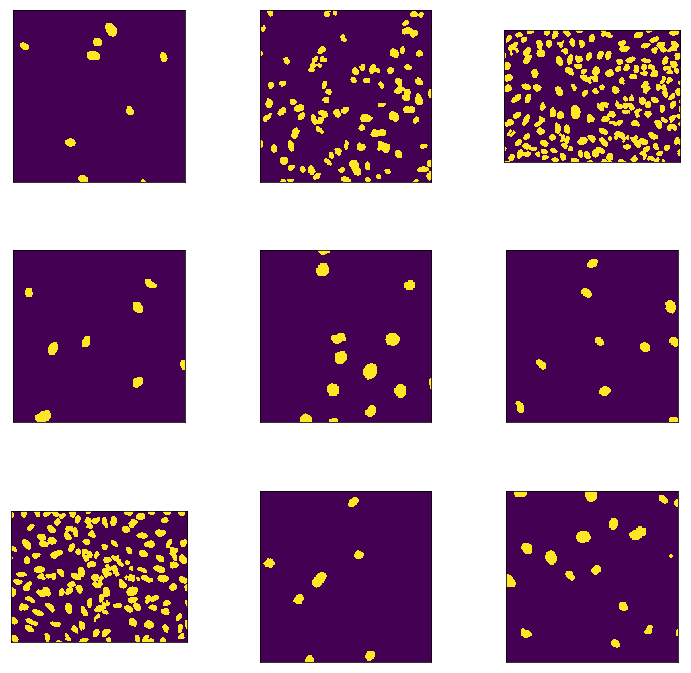

In [168]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [169]:
# Keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, Reshape
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils, plot_model
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

In [170]:
model = Sequential()
model.add(Conv2D(16, input_shape = (128, 128, 3), kernel_size = (7, 7), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.17))
model.add(Conv2D(32, kernel_size = (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.36))
model.add(Conv2D(64, kernel_size = (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.64))
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(1, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('sigmoid'))
model.add(Reshape((128, 128)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 128, 128, 16)      2368      
_________________________________________________________________
activation_85 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 128, 128, 32)      12832     
_________________________________________________________________
activation_86 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 128, 128, 64)      51264     
__________

In [ ]:
learning_rate = 0.01
optimizer = SGD(learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
for i in range(17):
    %time train = ip.get_batch_data(expand=8, seed=i**5)
    model.fit(train['x'], train['y'], batch_size=32, epochs=3, verbose=1)

Getting cropped images ...
Time Usage: 0.748485088348 sec
CPU times: user 6.05 s, sys: 1.28 s, total: 7.32 s
Wall time: 7.2 s
Epoch 1/3
40864/42880 [===========================>..] - ETA: 28s - loss: 0.4275 - acc: 0.8582

In [ ]:
ip.get_test_set(path='../../data/test', normalize=True)

In [ ]:
masks = []
stride = 16
for img in ip._test_imgs:
    coordinates = [
        (min(i, img.shape[0]-ip._size), min(j, img.shape[1]-ip._size))
        for i in range(0, img.shape[0], stride)
        for j in range(0, img.shape[1], stride)
    ]
    test_batch = model.predict(np.array([img[i: i+ip._size, j: j+ip._size] for i, j in coordinates]))
    mask = np.zeros(img.shape[:2])
    ratio = np.zeros(img.shape[:2])
    for (i, j), _mask in zip(coordinates, test_batch):
        mask[i: i+ip._size, j: j+ip._size] += _mask
        ratio[i: i+ip._size, j: j+ip._size] += np.ones((ip._size, ip._size))
    masks.append(mask.astype(np.float32)/ratio.astype(np.float32))
print masks[0]

In [ ]:
ip._test_masks = masks

In [ ]:
from skimage import io, transform, morphology, filters

In [ ]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    if type(mask_rle) == str:
        s = mask_rle.split()
    else:
        s = mask_rle
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [ ]:
def prob_to_rles(x, cutoff=0.5, debug=False, dilation=False):
    lab_img = morphology.label(x > cutoff) # split of components goes here
    if debug:
        plt.imshow(lab_img)
        plt.show() 
        lab_img2=lab_img
    if dilation:
        for i in range(1, lab_img.max() + 1):    
            lab_img = np.maximum(lab_img, ndimage.morphology.binary_dilation(lab_img==i)*i)
        if debug:
            plt.imshow(lab_img)
            plt.show()    
    for i in range(1, lab_img.max() + 1):
        img = lab_img == i
        yield rle_encoding(img)

In [ ]:
new_test_ids = []
rles = []
for id_, pred_mask in zip(ip._test_ids, ip._test_masks):
    rle = list(prob_to_rles(pred_mask, cutoff=0.5))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [ ]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))

sub.to_csv('submission.csv', index=False)

In [ ]:
print len(ip._test_imgs)
idx = np.array([np.random.randint(len(ip._test_imgs)) for i in range(9)])
imgs = [ip._test_imgs[i] for i in idx]
masks = [ip._test_masks[i] for i in idx]

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])